In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam


In [13]:
# Define paths
dataset_path = "Dataset"

# Data Augmentation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load Training Data
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),  # Reshape images to 150x150
    batch_size=16,
    class_mode='binary',
    subset='training'
)

# Load Validation Data
validation_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=16,
    class_mode='binary',
    subset='validation'
)


Found 22 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


In [14]:
from tensorflow.keras.optimizers import Adam

# Build the model
model = Sequential()

# Add Layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary Classification

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [15]:
history = model.fit(
    train_data,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    validation_data=validation_data,
    validation_steps=validation_data.samples // validation_data.batch_size,
    epochs=50  # You can change this based on your dataset size
)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.2500 - loss: 0.6950 - val_accuracy: 0.5000 - val_loss: 2.2471
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 0.5000 - loss: 2.8746 - val_accuracy: 0.5000 - val_loss: 0.7196
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.7196
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step - accuracy: 0.5000 - loss: 0.6939 - val_accuracy: 0.5000 - val_loss: 0.9702
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - accuracy: 0.4375 - loss: 0.9554 - val_accuracy: 0.5000 - val_loss: 0.6833
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.6833
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step - accuracy: 0.4375 - loss: 0.6966 - val_accuracy: 1.0000 - val_loss: 0.5390
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.8333 - loss: 0.6065 - val_accuracy: 1.000

In [16]:
loss, accuracy = model.evaluate(validation_data)
print(f"Validation Accuracy: {accuracy*100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 1.0000 - loss: 2.2962e-06
Validation Accuracy: 100.00%


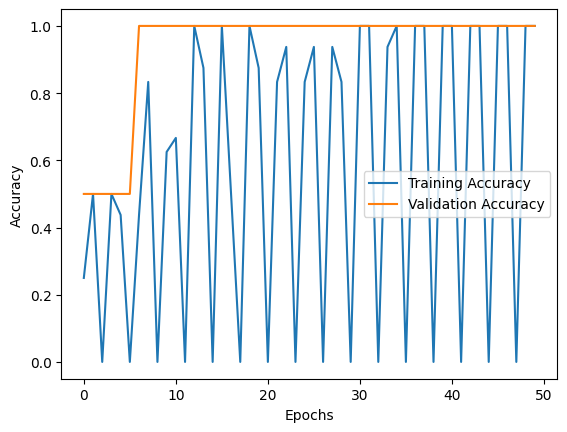

In [17]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [19]:
from tensorflow.keras.preprocessing import image
import numpy as np

def preprocess_image(img_path, target_size=(150, 150)):
    """Load and preprocess the image."""
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array


In [20]:
import matplotlib.pyplot as plt

def predict_and_show_image(model, img_path):
    """Make a prediction and display the image with the prediction label."""
    # Preprocess the image
    img_array = preprocess_image(img_path)
    
    # Make a prediction
    prediction = model.predict(img_array)
    label = "Fresh" if prediction < 0.5 else "Rotten"
    
    # Load the original image
    img = image.load_img(img_path)

    # Display the image
    plt.imshow(img)
    plt.title(f"Prediction: {label}")
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


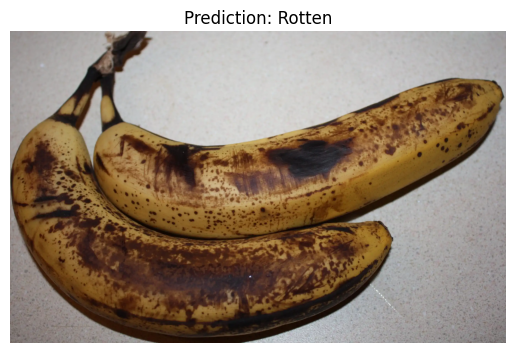

In [24]:
# Test the function with a sample image
img_path = 'asd.png'  # Replace with your image path
predict_and_show_image(model, img_path)


In [22]:
# After training your model
model.save('fruit_classification_model.h5')
